# K-Mean Clustering Implementation

In [75]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

## Prepare to random data

In [76]:
np.random.seed(11)

## Create data

In [77]:
means = [[2, 2], 
        [8, 3], 
        [3, 6]]
cov = [[1, 0], 
       [0, 1]]
N = 500

# data random
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

## Preprocess

In [78]:
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
original_label

array([0, 0, 0, ..., 2, 2, 2])

## Visualize data

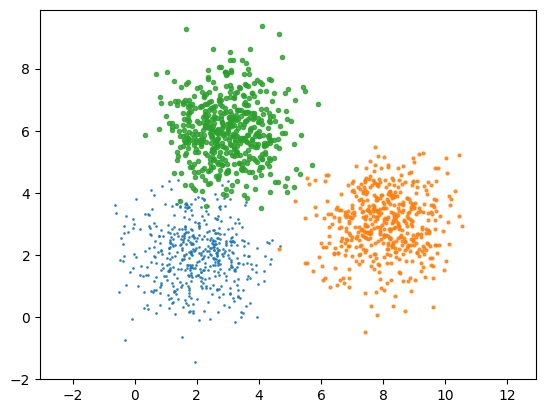

In [79]:
def kmeans_display(X, label):
    K = np.amax(label) + 1

    it = 0

    for k in range(K):
        it += 1
        data = X[label == k]
        plt.plot(data[:, 0], data[:, 1], 'o', alpha = .8, markersize = it)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

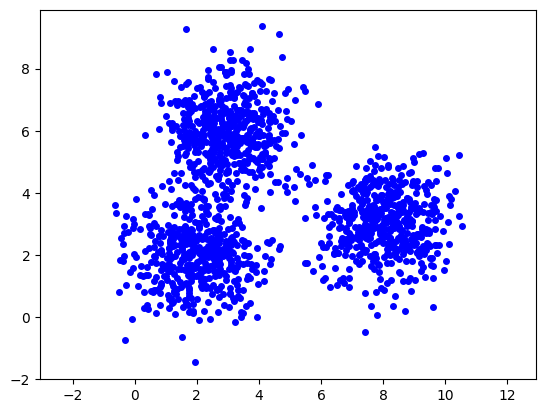

In [80]:
# Visualize X
plt.plot(X[:, 0], X[:, 1], 'bo', markersize = 4)

plt.axis('equal')

plt.show()

In [81]:
K = 3

## Main Implement

In [82]:
# Init center
from numpy import random
def init_center(data, k):
    return data[random.choice(data.shape[0], k, replace=False)]

In [83]:
# Assign label
from scipy.spatial.distance import cdist
def assign_label(data, center):
    D = cdist(data, center)
    return np.argmin(D, axis=1)

In [84]:
def update_center(data, label, k):
    centers = np.zeros((k, data.shape[1]))
    for i in range(k):
        centers[i] = np.mean(data[label == i], axis = 0)
    return centers

In [85]:
# Check stop condition
def has_converged(center, new_center):
    return (set([tuple(a) for a in center]) == set([tuple(a) for a in new_center]))

[[1.95180248 6.72897643]
 [1.9444814  3.06716532]
 [3.42144011 0.17309469]]


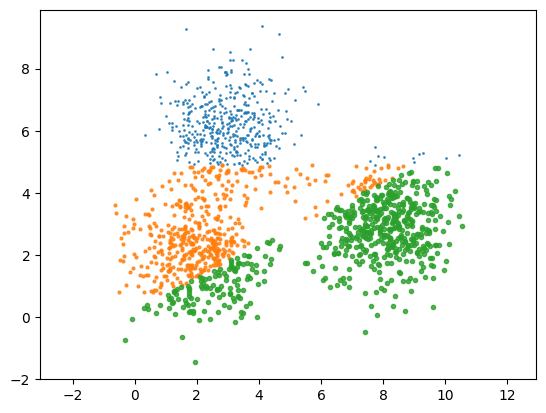

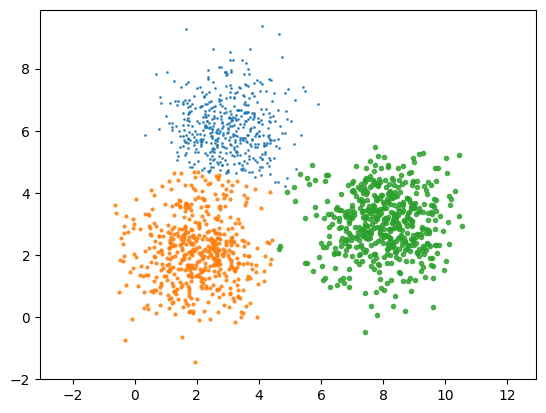

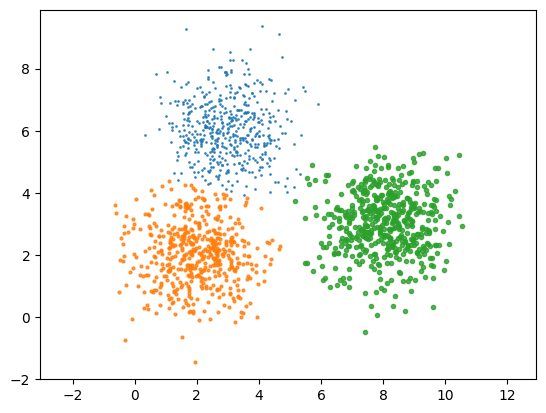

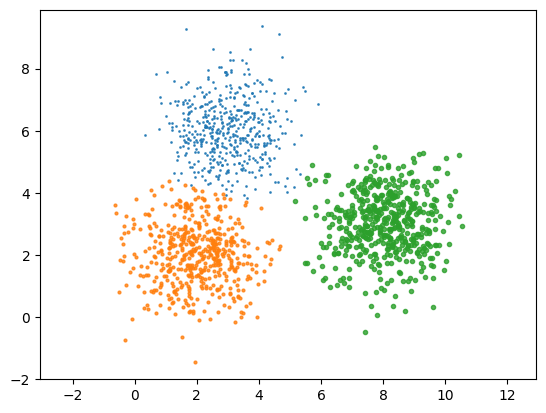

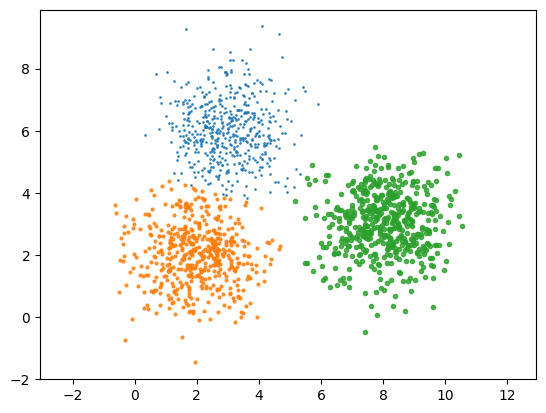

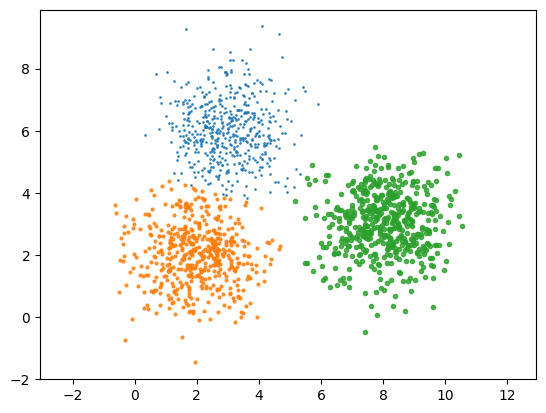

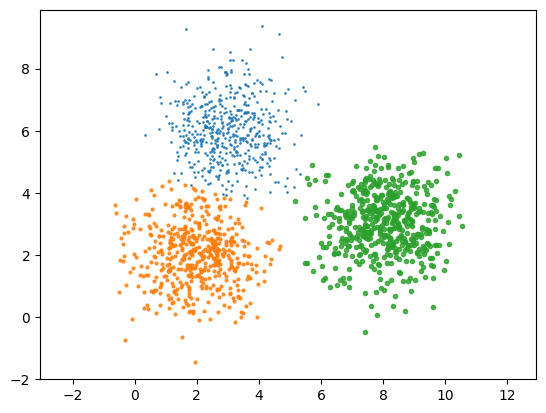

In [86]:
# main implemantation

pre_centers = init_center(X, K)
print(pre_centers)
true_centers = np.zeros(pre_centers.shape)
label = assign_label(X, pre_centers)
kmeans_display(X, label)

count = 0

while has_converged(pre_centers, true_centers) == False:
    pre_centers = true_centers
    true_centers = update_center(X, label, K)
    label = assign_label(X, true_centers)
    kmeans_display(X, label)
    count += 1


After 6 iterations, we find the centers of clusters are:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]
The labels of each data point are:
[3.74945474 1.713927  ] belongs to cluster 1
[ 1.51543487 -0.65331856] belongs to cluster 1
[1.99171537 1.68036864] belongs to cluster 1
[1.46337064 2.31540267] belongs to cluster 1
[2.42105072 0.93439702] belongs to cluster 1
[1.11376033 1.52426651] belongs to cluster 1
[2.68968231 2.56119218] belongs to cluster 1
[0.69445149 0.88052474] belongs to cluster 1
[2.73683739 3.57463407] belongs to cluster 1
[1.96892491 1.31655337] belongs to cluster 1
[3.0956297  1.69042336] belongs to cluster 1
[2.72575222 3.54907163] belongs to cluster 1
[2.63007982 2.07349324] belongs to cluster 1
[2.73227135 1.35742461] belongs to cluster 1
[1.82190682 1.42604544] belongs to cluster 1
[1.79562468 1.5135049 ] belongs to cluster 1
[1.81422468 1.61946358] belongs to cluster 1
[2.08897764 2.06367166] belongs to cluster 1
[2.29634711 3.402771

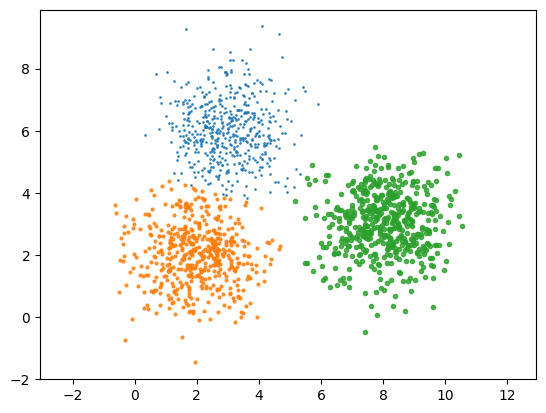

In [87]:
# print result
print(f'After {count} iterations, we find the centers of clusters are:')
print(true_centers)
print('The labels of each data point are:')
for idx, l in enumerate(label):
    print(X[idx], 'belongs to cluster', l)
kmeans_display(X, label)

Main kmeans function

## Use sklearn

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


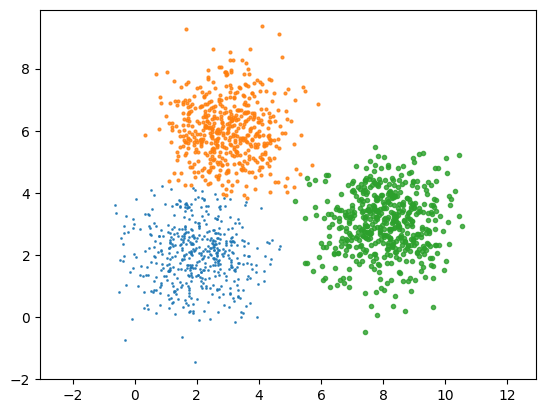

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)